# Explore and preprocess EURUSD data

First, import all necessary libraries and the data file

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Pretty display
%matplotlib inline

# Import data
data = pd.read_csv('data/EURUSD_M5_438K.csv')

In [32]:
# Lets transform the time column into a datetime "type"
from datetime import datetime
data['time'] = pd.to_datetime(data['time'], format='%Y_%m_%d_%H_%M_%S')

Let's see some random points in our data

In [33]:
data.sample(5)

,time,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
180560,2014-06-12 02:20:00,1.35348,1.35346,1.35352,1.35344,64.371257,64.577183,0.000066,0.000067,-0.000002
226967,2015-01-29 09:20:00,1.12929,1.12981,1.13004,1.12929,65.606749,67.540512,0.000524,0.000383,0.000141
415363,2017-08-08 09:35:00,1.18036,1.18029,1.18051,1.18015,33.524355,35.000999,-0.000152,-0.000127,-0.000025
64599,2012-11-13 07:05:00,1.26828,1.26806,1.26829,1.26793,53.571429,58.289541,-0.000019,-0.000037,0.000018
117469,2013-08-02 03:30:00,1.31983,1.31947,1.31984,1.31931,24.776604,21.061173,-0.000362,-0.000309,-0.000053


Everything looks normal. Now let's view some statistics of our data using the handy `'descibe'` function of pandas

In [34]:
data.describe()

,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
count,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,4.386400e+05,4.386400e+05,4.386400e+05
mean,11.677773,11.433027,12.063090,12.166126,134.182677,49.698128,-1.765522e-06,-1.763238e-06,-2.284511e-09
std,112.502253,111.153666,114.504286,115.457485,2200.830566,20.736170,4.321818e-04,4.258041e-04,1.043231e-04
min,1.034490,1.034490,1.035800,1.032490,1.630600,2.267673,-7.438083e-03,-7.053718e-03,-2.186876e-03
25%,1.115130,1.115130,1.115360,1.114910,32.248521,32.615648,-1.701806e-04,-1.677128e-04,-4.389836e-05
50%,1.224350,1.224290,1.224910,1.223970,49.721857,49.668944,-6.156445e-07,-6.989657e-07,1.129529e-07
75%,1.317343,1.317300,1.317640,1.317120,67.261905,66.760663,1.678373e-04,1.654748e-04,4.396166e-05
max,1394.000000,1395.000000,1395.000000,1393.000000,90625.000000,97.330773,7.210471e-03,6.871573e-03,2.316783e-03


There seems to be some strange outliers in the first 5 columns, let's see how they look in a plot. Because everything is better with plots

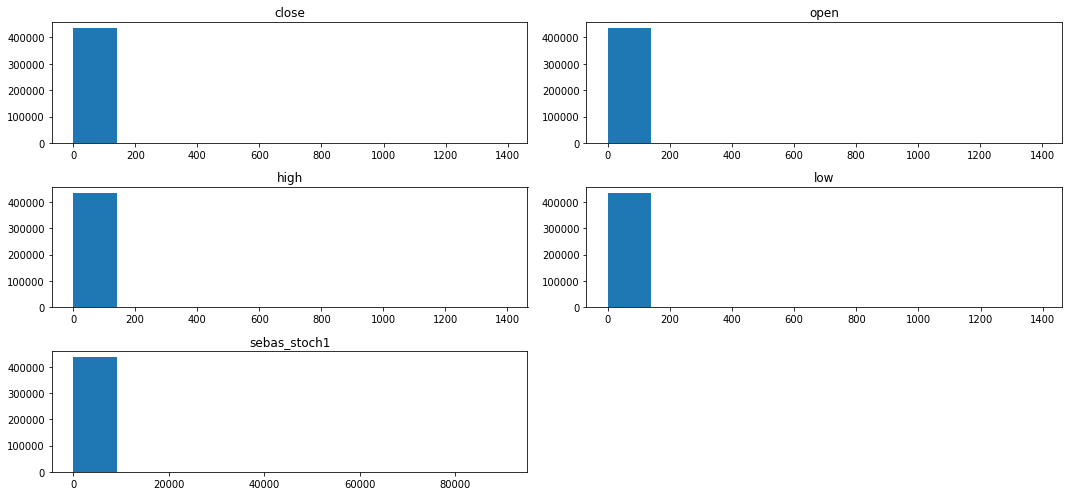

In [44]:
fig = plt.figure(figsize=(15,7))
for i in range(1,6):
    ax = fig.add_subplot(320 + i)
    ax.hist(data[data.columns[i]], label='a')
    ax.title.set_text(data.columns[i])
plt.tight_layout()
plt.show()

In [15]:
data

KeyError: 0